In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [161]:
def set_precision(t):
    tau = float(format(t, '.1f'))
    
    return tau

In [162]:
###### pairwise ttc values ######

pair_ttc_freq = dict()

# process pair_ttc data
with open('pair_ttc.json') as infile:
    pair_ttc_data = json.load(infile)
    
for t in pair_ttc_data:
    # round tau
    tau = set_precision(t)
    if pair_ttc_freq.has_key(tau):
        pair_ttc_freq[tau] = pair_ttc_freq[tau] + 1
    else:
        pair_ttc_freq[tau] = 1

total_pair = len(pair_ttc_data)
print 'total pair: ', total_pair
print 'total tau: ', len(pair_ttc_freq)

pair_lists = sorted(pair_ttc_freq.items()) # sorted by key, return a list of tuples
pair_df = pd.DataFrame(pair_lists, columns=['tau', 'freq'])
# normalize freq
pair_df['freq'] = pair_df['freq'].apply(lambda x: x / float(total_pair))
# write pair ttc csv
pair_df.to_csv('pairwise_ttc.csv', index=False)
print "Write to csv success."


total pair:  2679204
total tau:  910
Write to csv success.


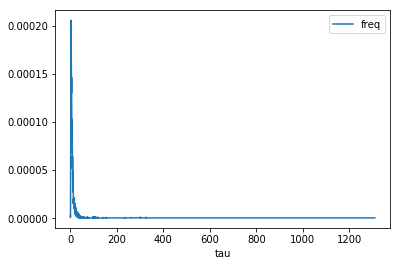

In [163]:
# draw pair ttc data
pair_df = pair_df.set_index('tau')
pair_df.plot( style=[])
plt.show()

In [164]:
###### pairwise ttc scrambled values ######

pair_ttc_scramble_freq = dict()

# process pair_ttc data
with open('pair_ttc_scramble.json') as infile:
    pair_ttc_scramble_data = json.load(infile)
    
for t in pair_ttc_scramble_data:
    # round tau
    tau = set_precision(t)
    if pair_ttc_scramble_freq.has_key(tau):
        pair_ttc_scramble_freq[tau] = pair_ttc_scramble_freq[tau] + 1
    else:
        pair_ttc_scramble_freq[tau] = 1

total_pair_scramble = len(pair_ttc_scramble_data)
print 'total pair scramble: ', total_pair_scramble
print 'total tau: ', len(pair_ttc_scramble_freq)

pair_scramble_lists = sorted(pair_ttc_scramble_freq.items()) # sorted by key, return a list of tuples
pair_scramble_df = pd.DataFrame(pair_scramble_lists, columns=['tau', 'freq'])
# normalize freq
pair_scramble_df['freq'] = pair_scramble_df['freq'].apply(lambda x: x / float(total_pair_scramble))
# write pair ttc csv
pair_scramble_df.to_csv('pairwise_ttc_scrambles.csv', index=False)
print "Write to csv success."

total pair scramble:  2679204
total tau:  1079
Write to csv success.


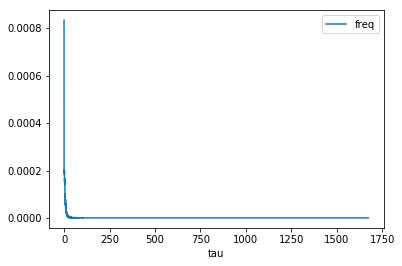

In [165]:
# draw pair ttc scrambled data
pair_scramble_df = pair_scramble_df.set_index('tau')
pair_scramble_df.plot(style=[])
plt.show()

In [166]:
##### pair distribution fuction #####

pair_tau = pair_df.index.tolist()
pair_scramble_tau = pair_scramble_df.index.tolist()
pdf = dict()

tau_values = set(pair_tau + pair_scramble_tau)
for tau in tau_values:
    if tau in pair_tau and tau in pair_scramble_tau:
        pdf[tau] = pair_df.loc[tau, :].get('freq') / pair_scramble_df.loc[tau, :].get('freq')
        
pdf_lists = sorted(pdf.items()) # sorted by key, return a list of tuples
pdf_df = pd.DataFrame(pdf_lists, columns=['tau', 'g(tau)'])
# write pair ttc csv
pdf_df.to_csv('pdf.csv', index=False)
print "Write to csv success."

Write to csv success.


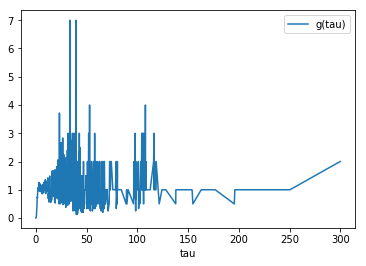

In [167]:
# draw pdf
pdf_df_by_tau = pdf_df.set_index('tau')
pdf_df_by_tau.plot(style=[])
plt.show()

In [168]:
##### interaction energy #####

import math

u_df = pd.read_csv('pdf.csv')
u_df.columns = ['tau', 'energy']
u_df['energy'] = u_df['energy'].apply(lambda x: math.log(1.0 / x) if x != 0.0 else math.log(1.0 / np.finfo('float64').eps))
u_df.to_csv('energy.csv', index=False)
print "Write to csv success."

Write to csv success.


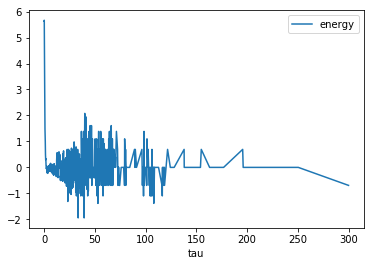

In [169]:
# draw energy
u_df = u_df.set_index('tau')
u_df.plot(style=[])
plt.show()